<a href="https://colab.research.google.com/github/debmalyabasak/debmalyabasak.github.io/blob/main/GaussianSums-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a large value for X: 1000000
Enter the real part of s: -2
Generated s-values (sorted by increasing imaginary part):
s1 = (-2+0j)
s2 = (-2+6j)
s3 = (-2+8j)
s4 = (-2+12j)
s5 = (-2+16j)
s6 = (-2+22j)
s7 = (-2+31j)
s8 = (-2+45j)
s9 = (-2+48j)
s10 = (-2+50j)
Number of primes in the range [1000000, 2000000]: 70435


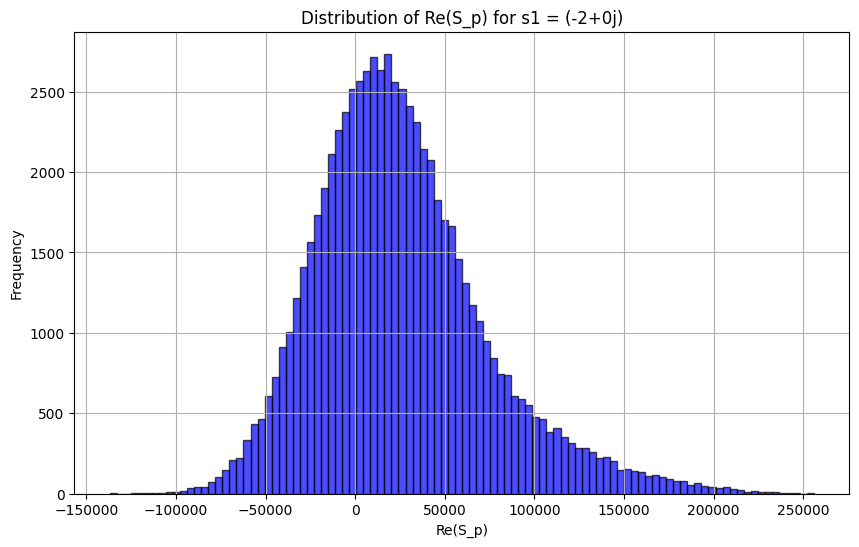

Mean of Re(S_p) for s1: 25184.742017462908
Standard deviation of Re(S_p) for s1: 48020.541603817284


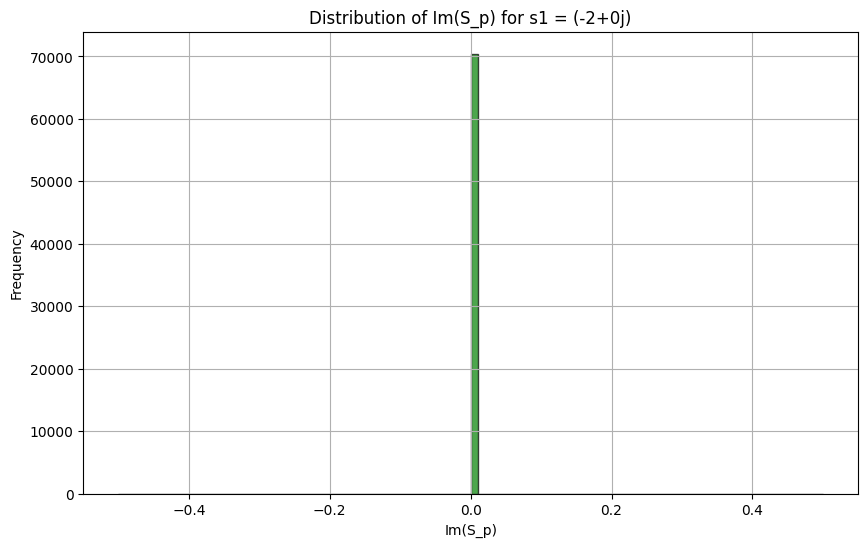

Mean of Im(S_p) for s1: 0.0
Standard deviation of Im(S_p) for s1: 0.0


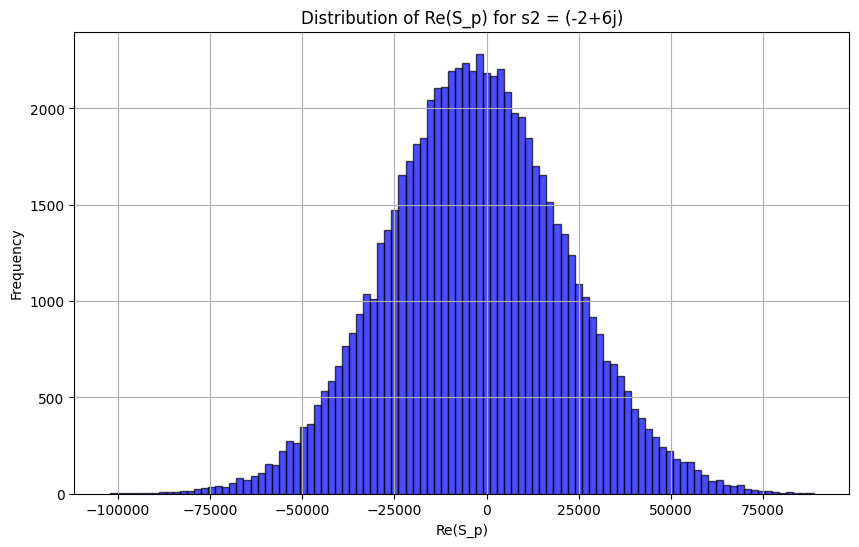

Mean of Re(S_p) for s2: -2918.6185964563624
Standard deviation of Re(S_p) for s2: 24204.357903926986


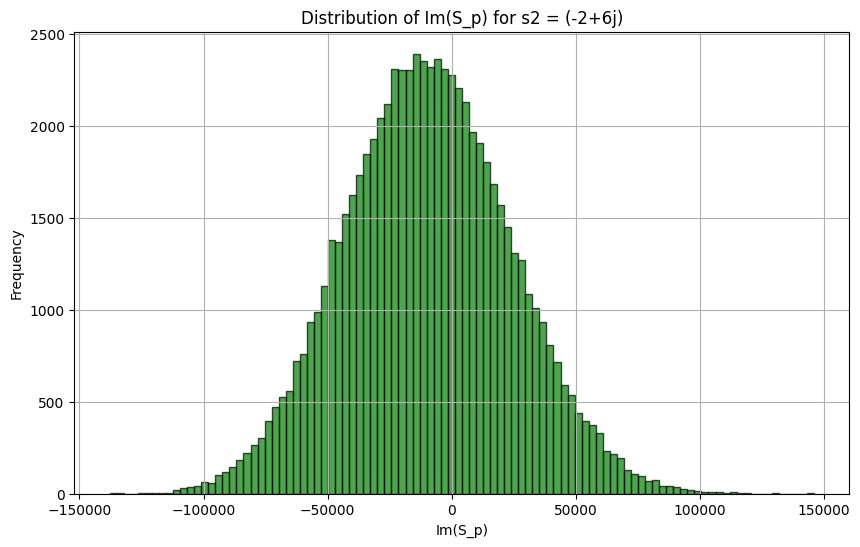

Mean of Im(S_p) for s2: -9754.000569385391
Standard deviation of Im(S_p) for s2: 33475.34234619529


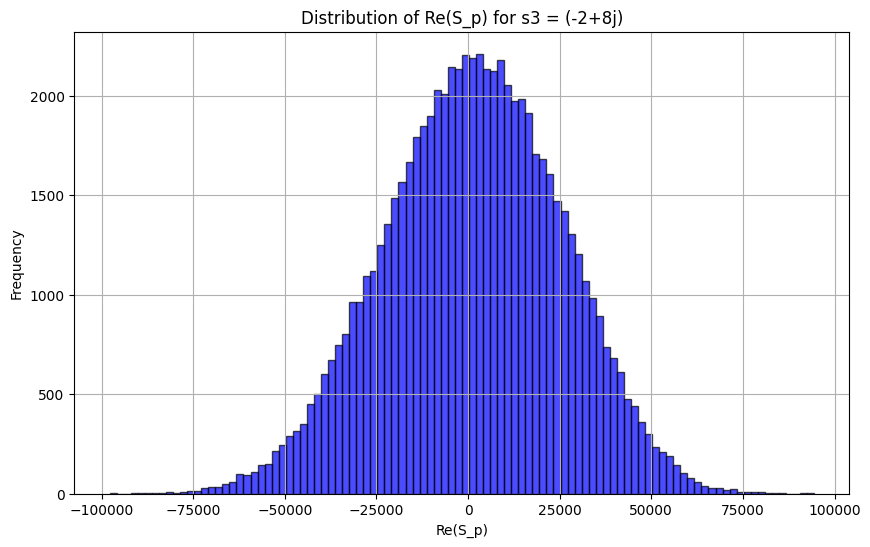

Mean of Re(S_p) for s3: 1316.4035854169433
Standard deviation of Re(S_p) for s3: 24121.11837958737


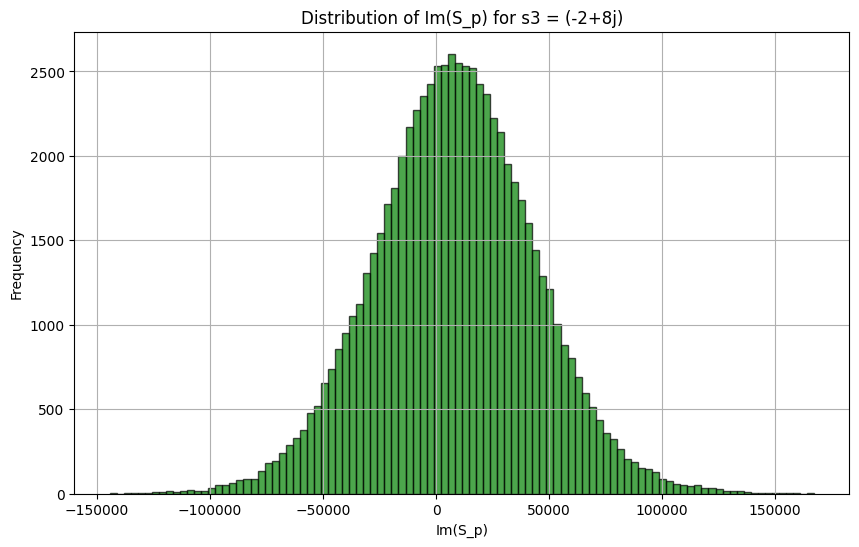

Mean of Im(S_p) for s3: 8157.846233316262
Standard deviation of Im(S_p) for s3: 35489.13472990174


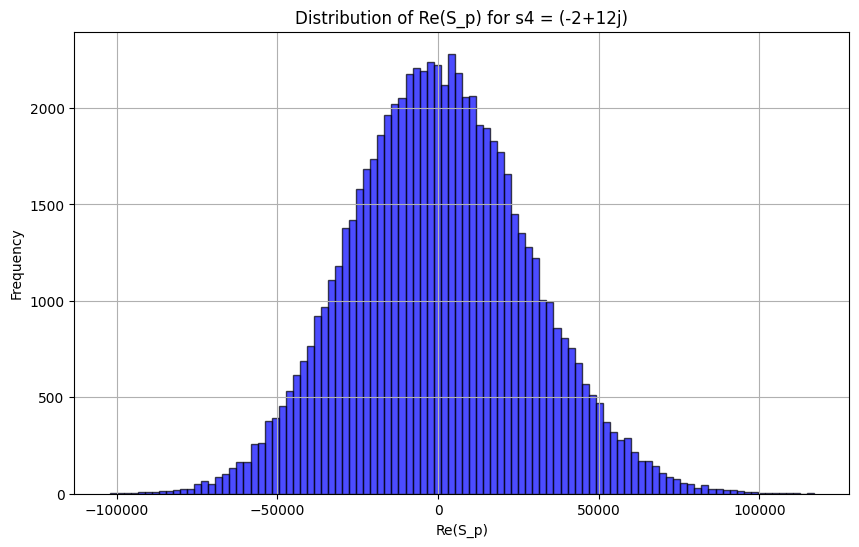

Mean of Re(S_p) for s4: 449.0425967894602
Standard deviation of Re(S_p) for s4: 27613.141317518242


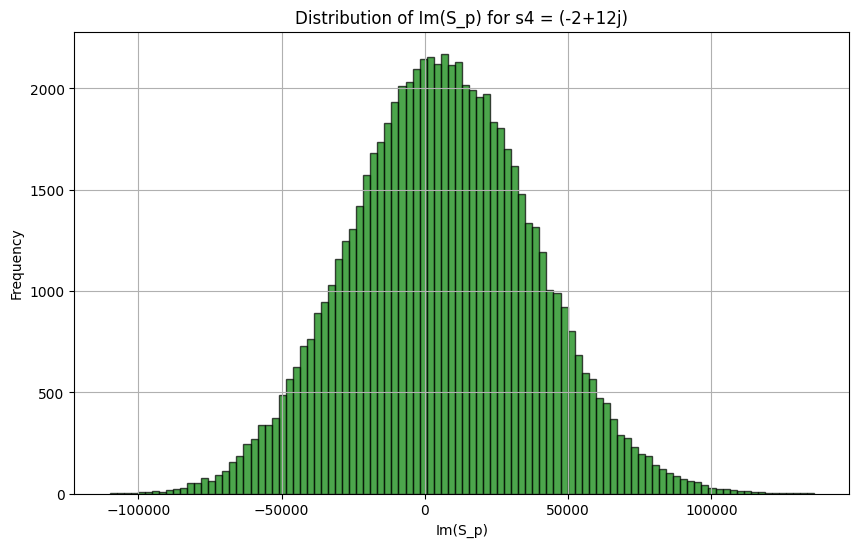

Mean of Im(S_p) for s4: 6104.123879462955
Standard deviation of Im(S_p) for s4: 31802.169208674193


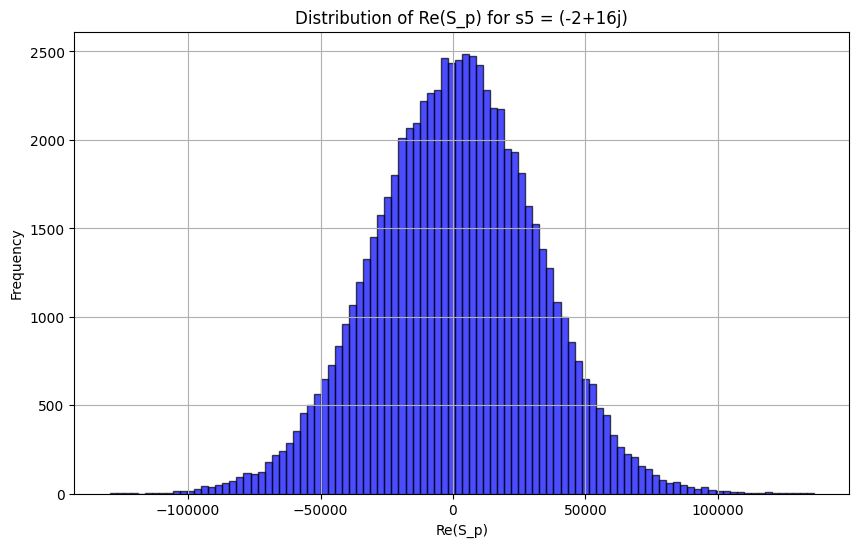

Mean of Re(S_p) for s5: 872.3308269670308
Standard deviation of Re(S_p) for s5: 30800.013403091634


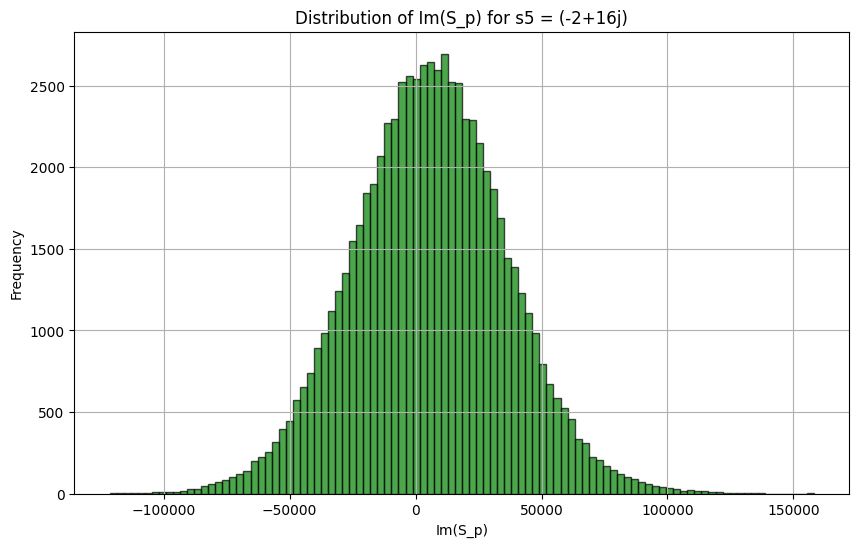

Mean of Im(S_p) for s5: 5665.275447410875
Standard deviation of Im(S_p) for s5: 30452.972315322157


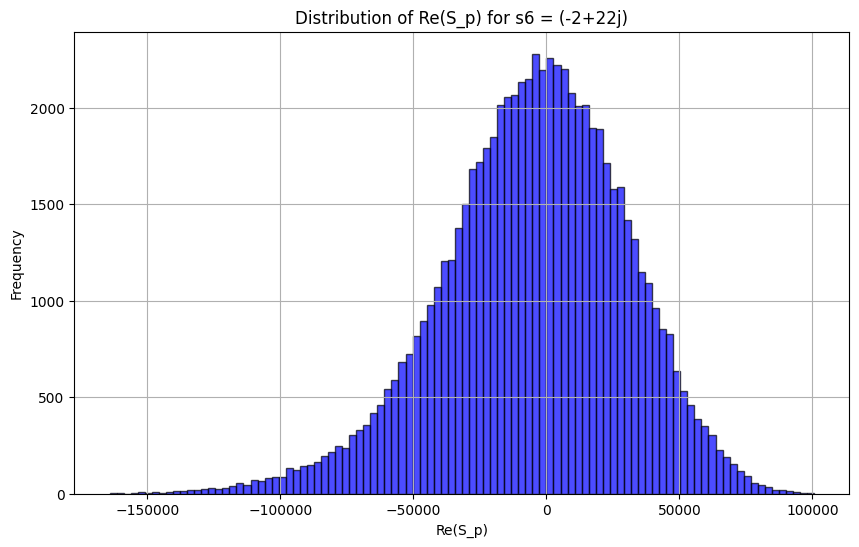

Mean of Re(S_p) for s6: -4849.535092025992
Standard deviation of Re(S_p) for s6: 34615.70385479665


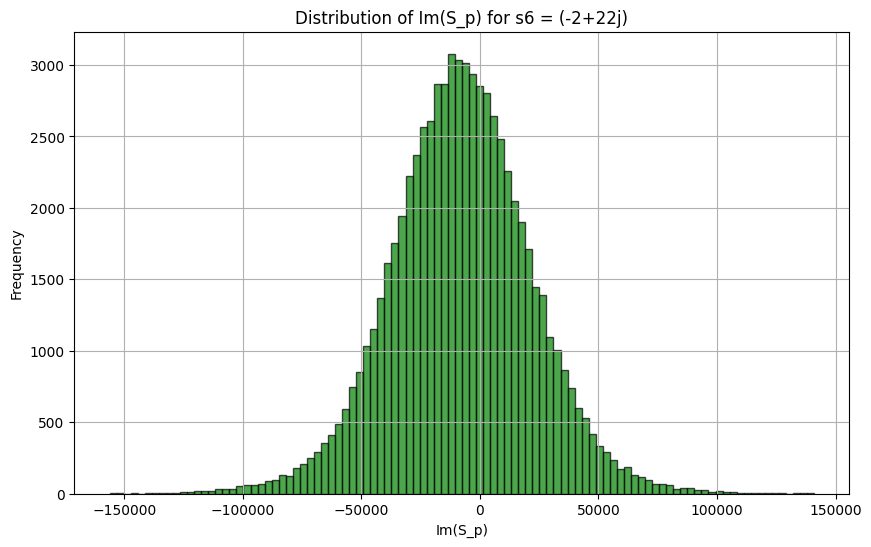

Mean of Im(S_p) for s6: -8030.701046699596
Standard deviation of Im(S_p) for s6: 29681.536805261167


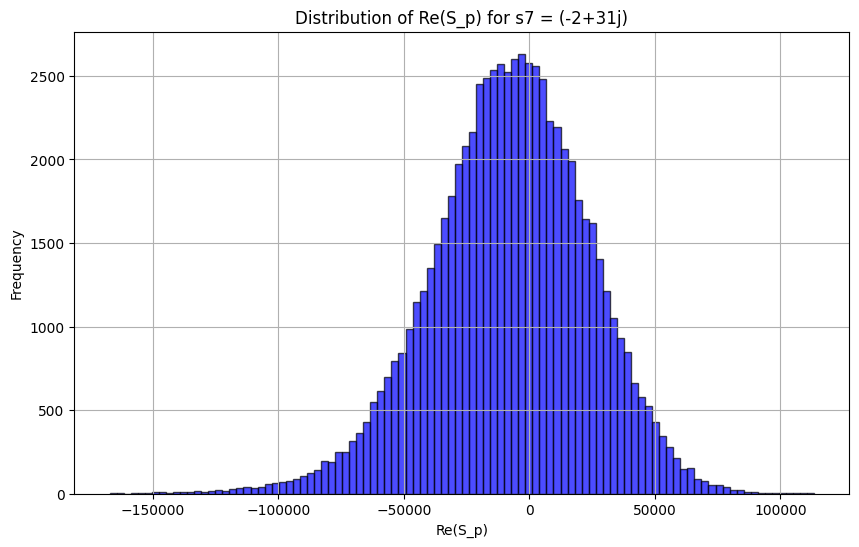

Mean of Re(S_p) for s7: -7993.725490577551
Standard deviation of Re(S_p) for s7: 31326.40471205034


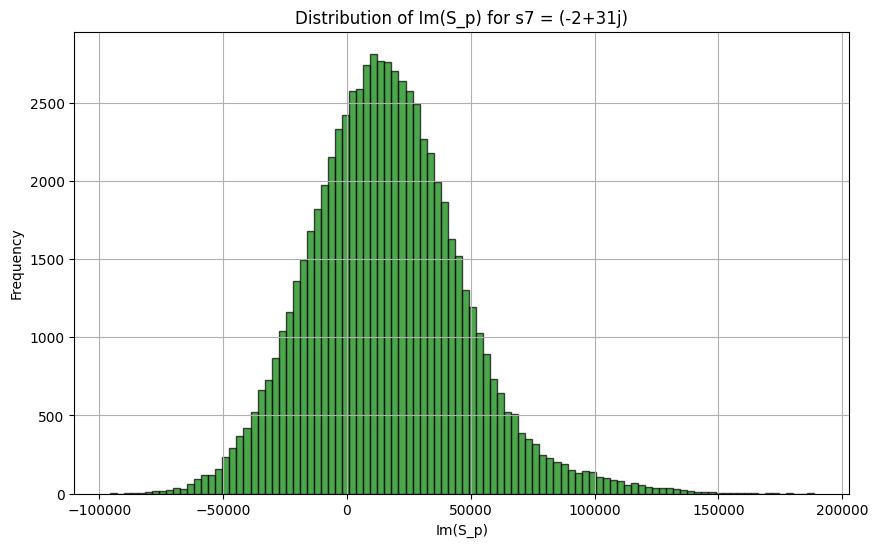

Mean of Im(S_p) for s7: 15900.359101661239
Standard deviation of Im(S_p) for s7: 30791.197111924033


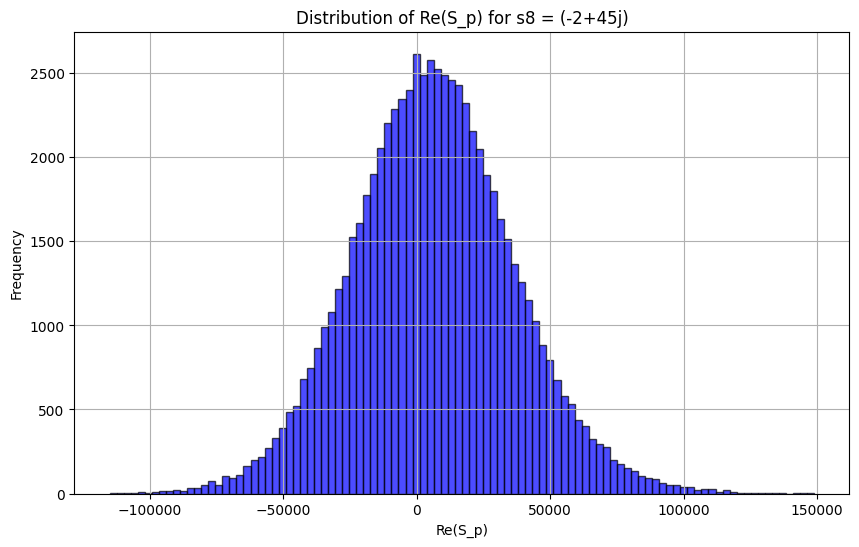

Mean of Re(S_p) for s8: 6196.739500431511
Standard deviation of Re(S_p) for s8: 30351.526467826927


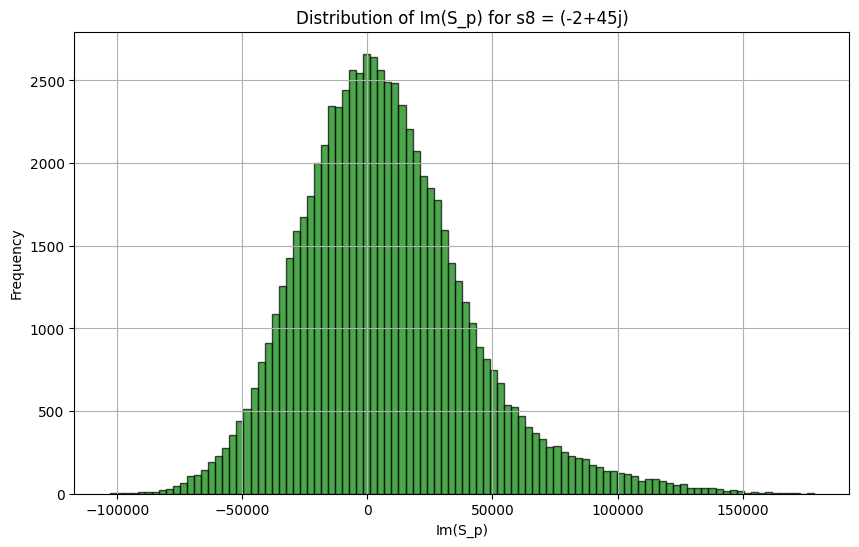

Mean of Im(S_p) for s8: 6831.044429081565
Standard deviation of Im(S_p) for s8: 34067.043293336836


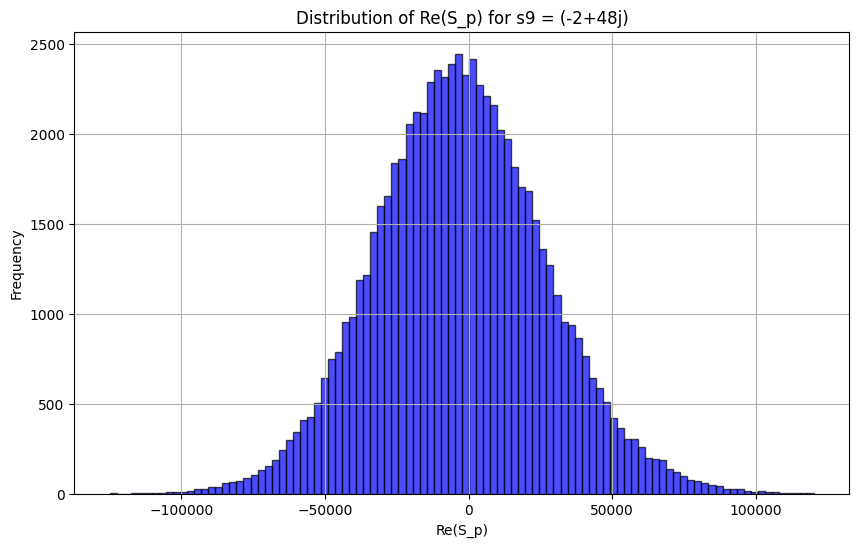

Mean of Re(S_p) for s9: -2832.421826293802
Standard deviation of Re(S_p) for s9: 29653.310377375


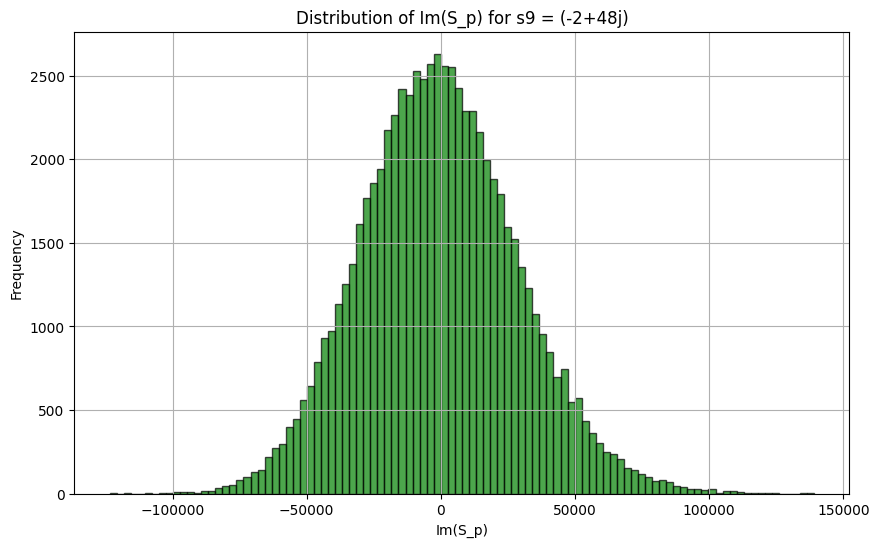

Mean of Im(S_p) for s9: -579.0262510161623
Standard deviation of Im(S_p) for s9: 29283.91397830368


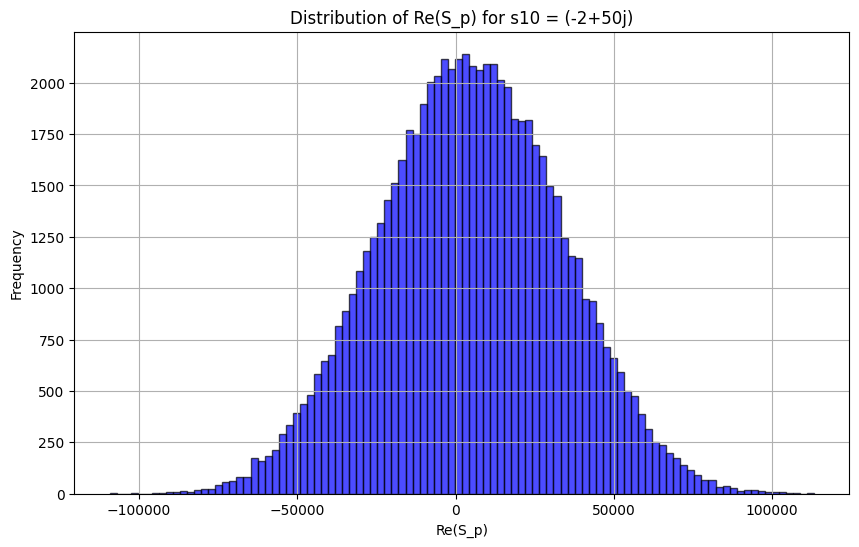

Mean of Re(S_p) for s10: 4584.928965357485
Standard deviation of Re(S_p) for s10: 28753.79973553522


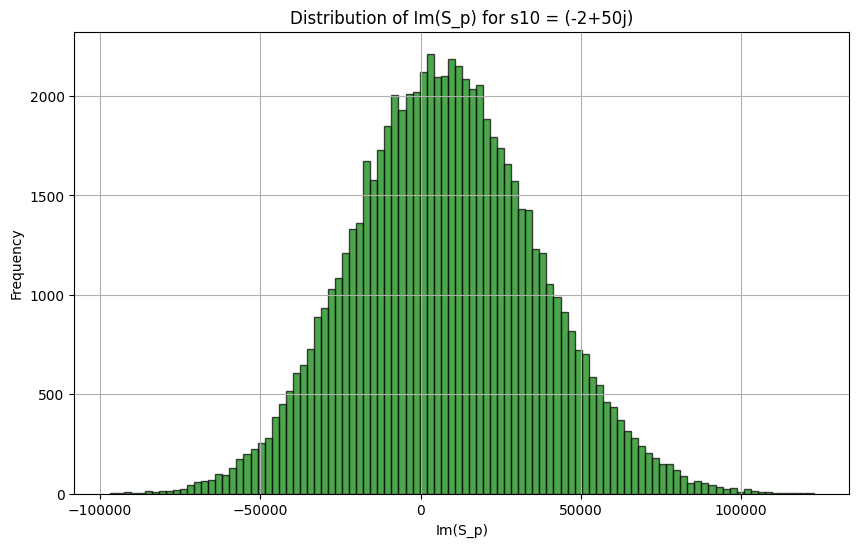

Mean of Im(S_p) for s10: 7851.558229393317
Standard deviation of Im(S_p) for s10: 28691.77856443384


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values with imaginary parts between 0 and 50
imaginary_parts = random.sample(range(1, 51), 9)  # Pick 9 unique random integers between 1 and 50
imaginary_parts.append(0)  # Ensure one value is 0
imaginary_parts.sort()  # Sort in increasing order

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values (sorted by increasing imaginary part):")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Functions to compute Re(S_p) and Im(S_p) for a given s
def compute_S_p_parts(s):
    S_real = []  # Store the real part of S_p for each p
    S_imag = []  # Store the imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)
        S_imag.append(S_imag_p)

    # Ensure all elements in S_real and S_imag are floats
    S_real_float = []
    S_imag_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Re(S_p): {val}")

    for val in S_imag:
        try:
            S_imag_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Im(S_p): {val}")

    # Convert to NumPy arrays for further processing
    S_real_float = np.array(S_real_float)
    S_imag_float = np.array(S_imag_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]
    finite_S_imag = S_imag_float[np.isfinite(S_imag_float)]

    return finite_S_real, finite_S_imag

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real, finite_S_imag = compute_S_p_parts(s)

    if len(finite_S_real) == 0 and len(finite_S_imag) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
        continue

    # Plot histogram of the real part of S_p for the current s
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")

    # Plot histogram of the imaginary part of S_p for the current s
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Im(S_p) for s{idx} = {s}")
        plt.xlabel("Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Im(S_p) for s{idx}: {mean_imag}")
        print(f"Standard deviation of Im(S_p) for s{idx}: {std_imag}")


Enter a large value for X: 3000000
Enter the real part of s: -2
Generated s-values (sorted by increasing imaginary part):
s1 = (-2+0j)
s2 = (-2+1j)
s3 = (-2+12j)
s4 = (-2+26j)
s5 = (-2+28j)
s6 = (-2+36j)
s7 = (-2+37j)
s8 = (-2+40j)
s9 = (-2+45j)
s10 = (-2+49j)
Number of primes in the range [3000000, 6000000]: 196033


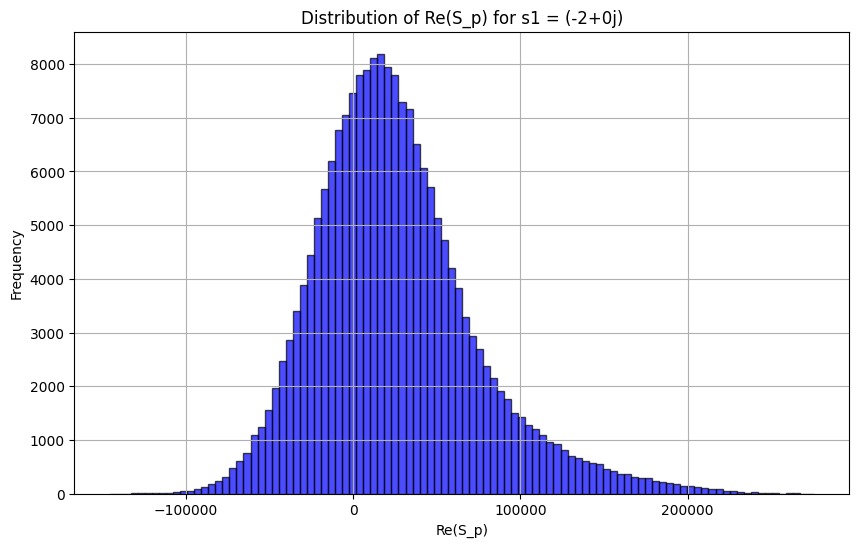

Mean of Re(S_p) for s1: 25279.4882188203
Standard deviation of Re(S_p) for s1: 48288.53664385603


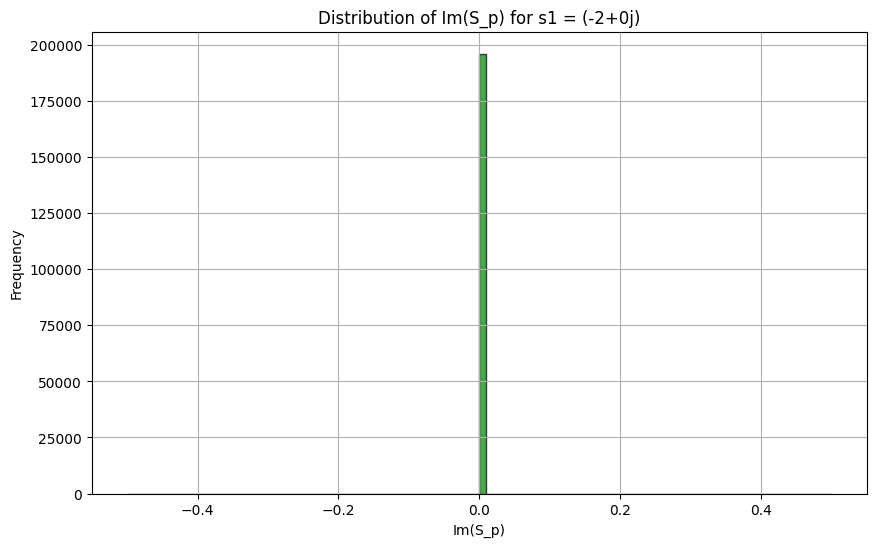

Mean of Im(S_p) for s1: 0.0
Standard deviation of Im(S_p) for s1: 0.0


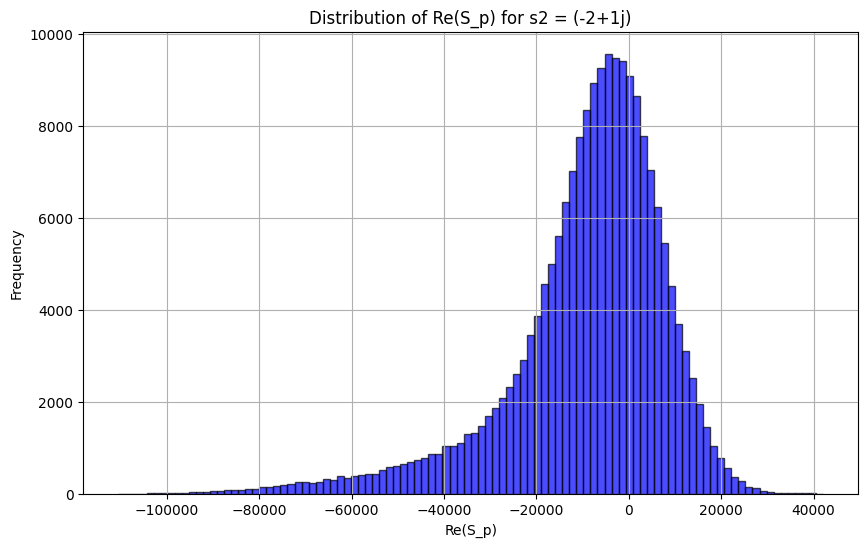

Mean of Re(S_p) for s2: -9083.56731426008
Standard deviation of Re(S_p) for s2: 17323.358377193374


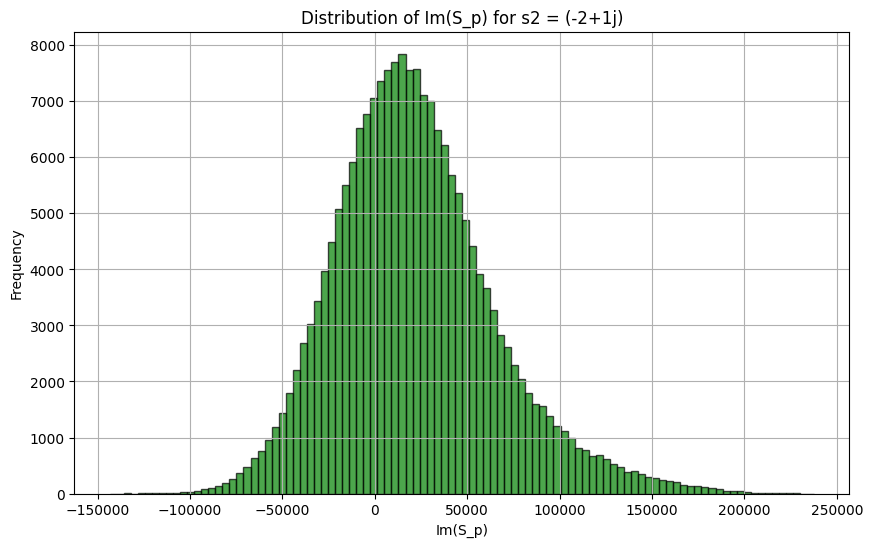

Mean of Im(S_p) for s2: 21679.955660734504
Standard deviation of Im(S_p) for s2: 43486.94449559071


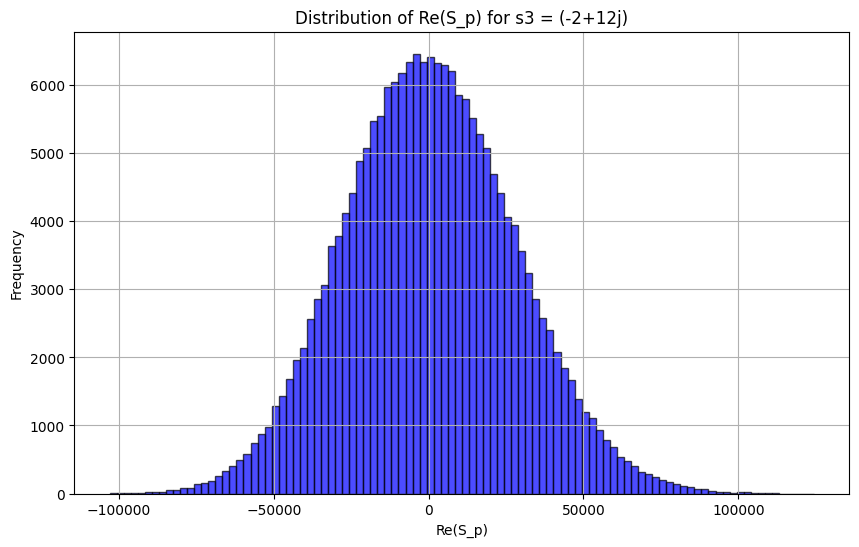

Mean of Re(S_p) for s3: 373.38893106917743
Standard deviation of Re(S_p) for s3: 27578.761496512896


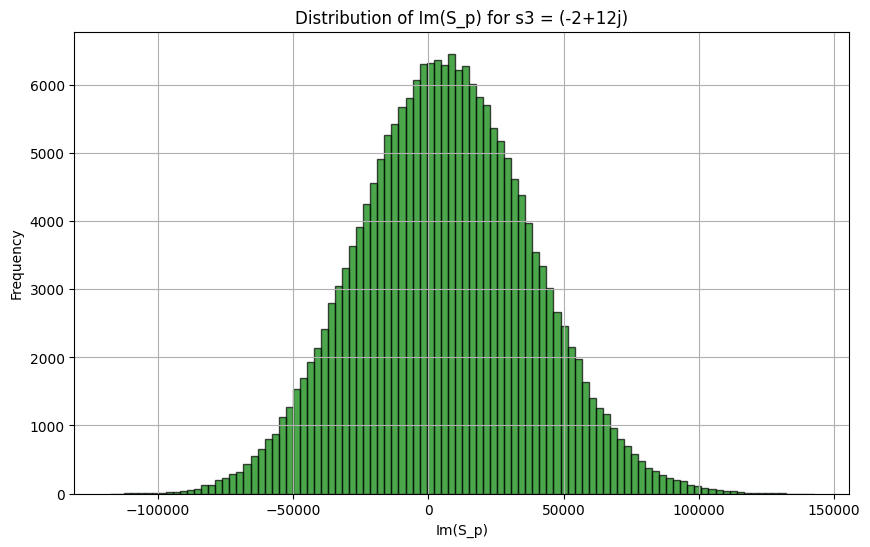

Mean of Im(S_p) for s3: 6223.656347310933
Standard deviation of Im(S_p) for s3: 31774.683227278674


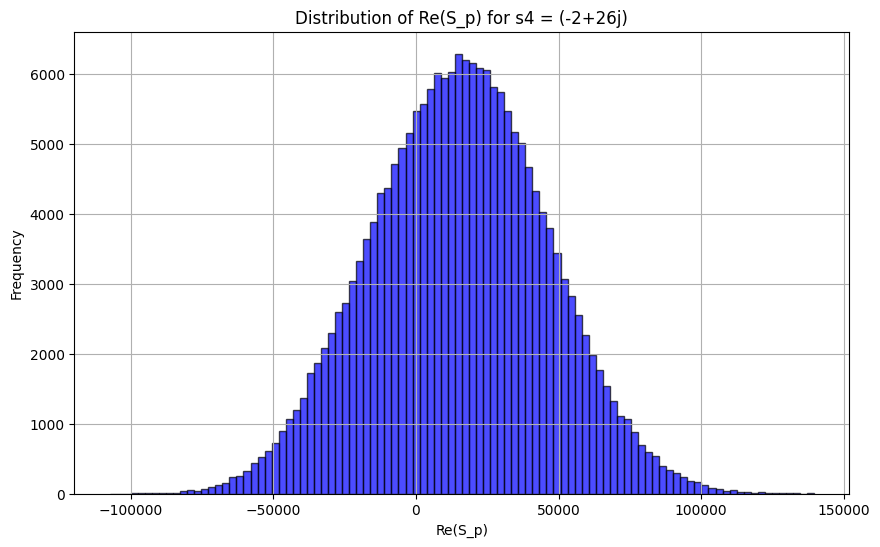

Mean of Re(S_p) for s4: 15123.0039024875
Standard deviation of Re(S_p) for s4: 30751.805145706363


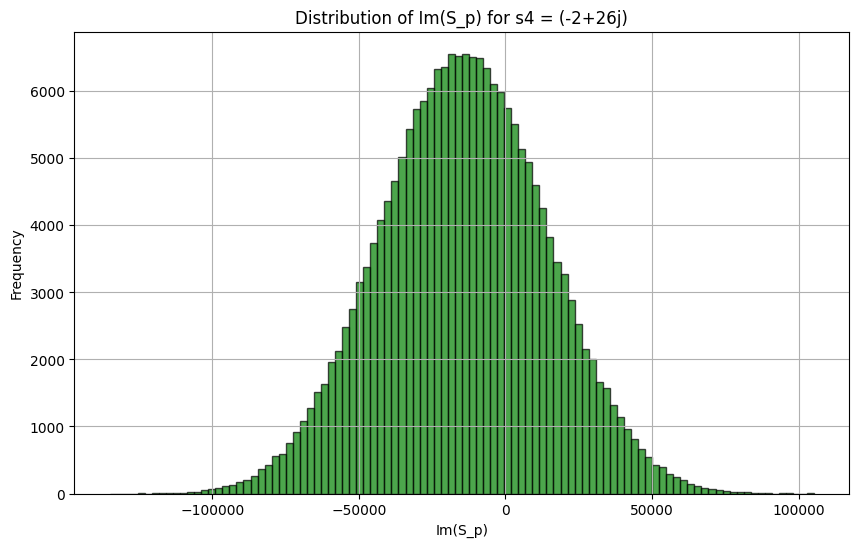

Mean of Im(S_p) for s4: -14435.823479148172
Standard deviation of Im(S_p) for s4: 28339.33429960168


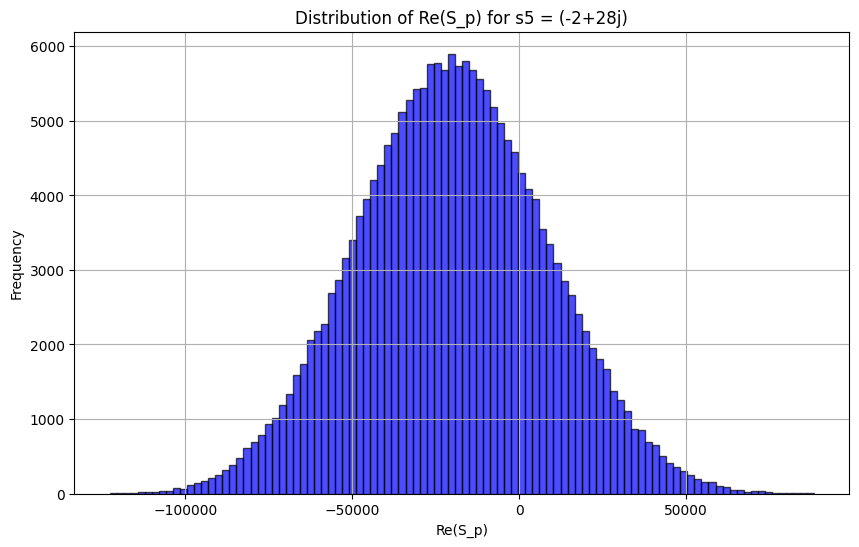

Mean of Re(S_p) for s5: -20153.81316221749
Standard deviation of Re(S_p) for s5: 28288.20716716377


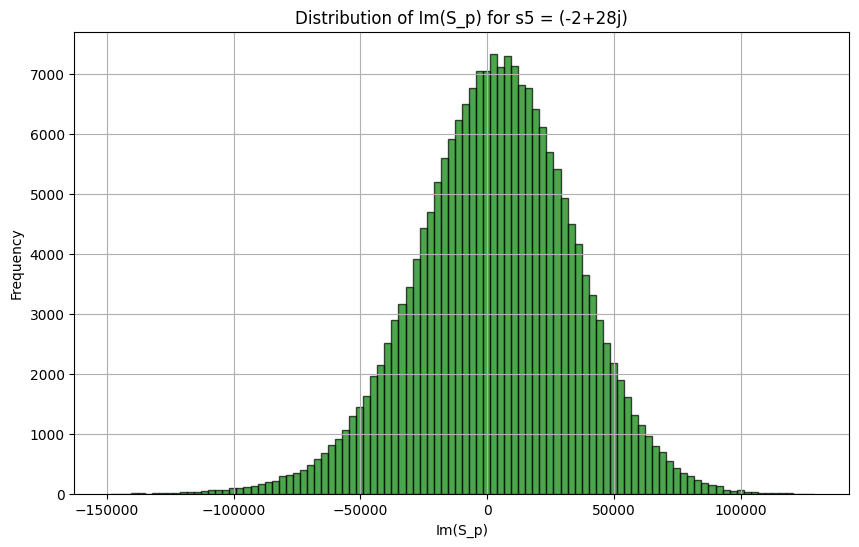

Mean of Im(S_p) for s5: 3127.2911907961834
Standard deviation of Im(S_p) for s5: 31049.479028873156


In [ ]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values with imaginary parts between 0 and 50
imaginary_parts = random.sample(range(1, 51), 9)  # Pick 9 unique random integers between 1 and 50
imaginary_parts.append(0)  # Ensure one value is 0
imaginary_parts.sort()  # Sort in increasing order

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values (sorted by increasing imaginary part):")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Functions to compute Re(S_p) and Im(S_p) for a given s
def compute_S_p_parts(s):
    S_real = []  # Store the real part of S_p for each p
    S_imag = []  # Store the imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)
        S_imag.append(S_imag_p)

    # Ensure all elements in S_real and S_imag are floats
    S_real_float = []
    S_imag_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Re(S_p): {val}")

    for val in S_imag:
        try:
            S_imag_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Im(S_p): {val}")

    # Convert to NumPy arrays for further processing
    S_real_float = np.array(S_real_float)
    S_imag_float = np.array(S_imag_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]
    finite_S_imag = S_imag_float[np.isfinite(S_imag_float)]

    return finite_S_real, finite_S_imag

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real, finite_S_imag = compute_S_p_parts(s)

    if len(finite_S_real) == 0 and len(finite_S_imag) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
        continue

    # Plot histogram of the real part of S_p for the current s
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")

    # Plot histogram of the imaginary part of S_p for the current s
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Im(S_p) for s{idx} = {s}")
        plt.xlabel("Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Im(S_p) for s{idx}: {mean_imag}")
        print(f"Standard deviation of Im(S_p) for s{idx}: {std_imag}")


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Allow user input for the fixed s value
s_real = float(input("Enter the real part of s: "))
s_imag = float(input("Enter the imaginary part of s: "))
s = complex(s_real, s_imag)

# Generate 5 different X values randomly between 10,000 and 1,000,000
X_values = random.sample(range(10000, 1000001), 5)
X_values.sort()  # Sort X values for better visualization

print("Generated X values (sorted):", X_values)

K = 100  # Fixed upper bound for k

# Function to compute normalized Re(S_p) and Im(S_p) for a fixed X and s
def compute_normalized_S_p(X, s):
    all_primes = list(sympy.primerange(X, 2 * X))
    num_primes = len(all_primes)
    if num_primes == 0:
        print(f"No primes found in the range [{X}, {2 * X}].")
        return None, None

    S_real = []  # Store the normalized real part of S_p for each p
    S_imag = []  # Store the normalized imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        # Normalize S_p by dividing by 10
        S_real.append(S_real_p / 10)
        S_imag.append(S_imag_p / 10)

    # Ensure all elements in S_real and S_imag are floats
    S_real_float = np.array([float(val) for val in S_real if np.isfinite(val)])
    S_imag_float = np.array([float(val) for val in S_imag if np.isfinite(val)])

    return S_real_float, S_imag_float

# Compute S_p and plot for each X value
for idx, X in enumerate(X_values, start=1):
    finite_S_real, finite_S_imag = compute_normalized_S_p(X, s)

    if finite_S_real is None or finite_S_imag is None:
        continue

    # Plot histogram of the normalized real part of S_p for the current X
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Normalized Re(S_p) for X = {X} and s = {s}")
        plt.xlabel("Normalized Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Normalized Re(S_p) for X = {X}: {mean_real}")
        print(f"Standard deviation of Normalized Re(S_p) for X = {X}: {std_real}")

    # Plot histogram of the normalized imaginary part of S_p for the current X
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Normalized Im(S_p) for X = {X} and s = {s}")
        plt.xlabel("Normalized Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Normalized Im(S_p) for X = {X}: {mean_imag}")
        print(f"Standard deviation of Normalized Im(S_p) for X = {X}: {std_imag}")


Enter the real part of s: 0
Enter the imaginary part of s: 5
Generated X values (sorted): [132255, 238270, 478054, 932227, 999200]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Enter the real part of s: 0
Enter the imaginary part of s: 5
Generated X values (sorted): [221745, 363170, 726160, 811245, 842182]


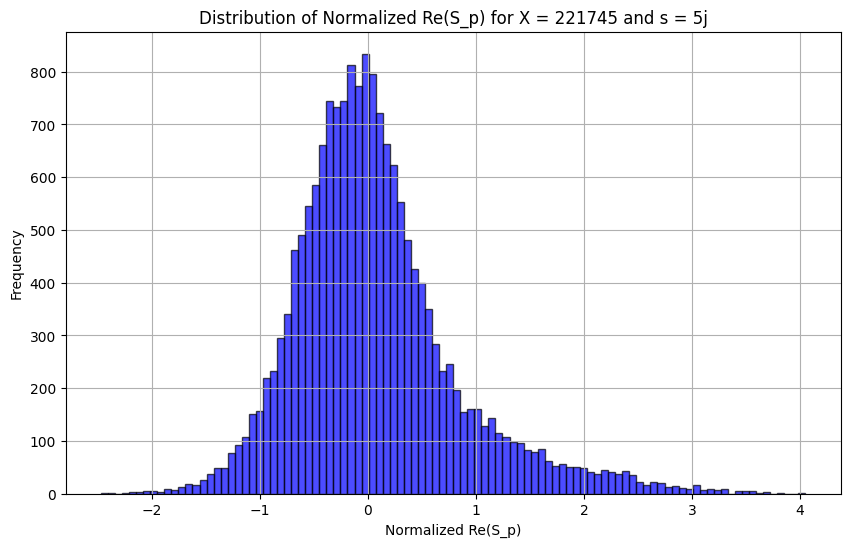

Mean of Normalized Re(S_p) for X = 221745: 0.06634372380993218
Standard deviation of Normalized Re(S_p) for X = 221745: 0.7633331957765908


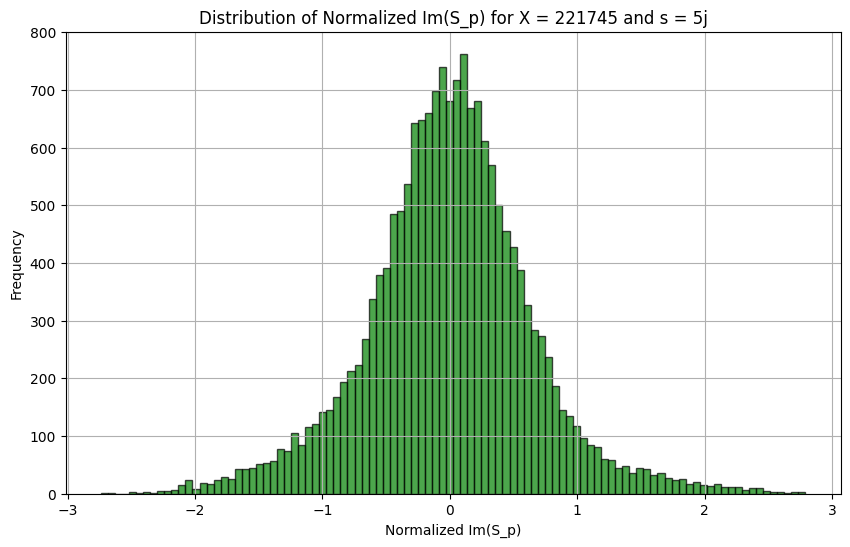

Mean of Normalized Im(S_p) for X = 221745: -0.008214446495349727
Standard deviation of Normalized Im(S_p) for X = 221745: 0.6503303622368318


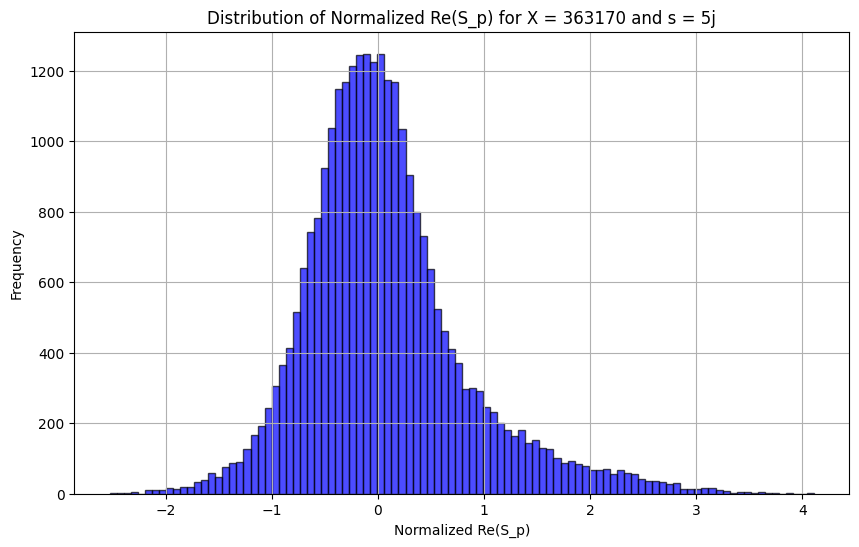

Mean of Normalized Re(S_p) for X = 363170: 0.06686918102213708
Standard deviation of Normalized Re(S_p) for X = 363170: 0.7645985448345525


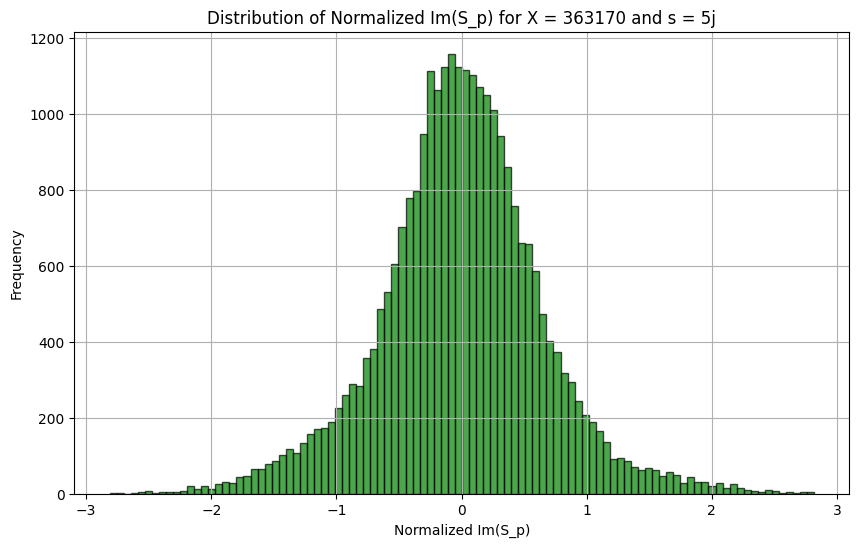

Mean of Normalized Im(S_p) for X = 363170: -0.005741840657888965
Standard deviation of Normalized Im(S_p) for X = 363170: 0.6489647848362744


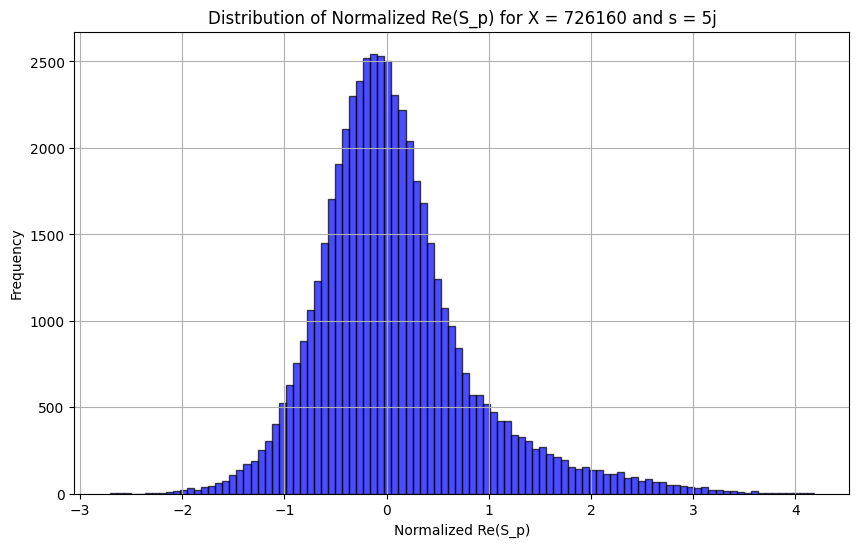

Mean of Normalized Re(S_p) for X = 726160: 0.07084514892571034
Standard deviation of Normalized Re(S_p) for X = 726160: 0.7614528396059793


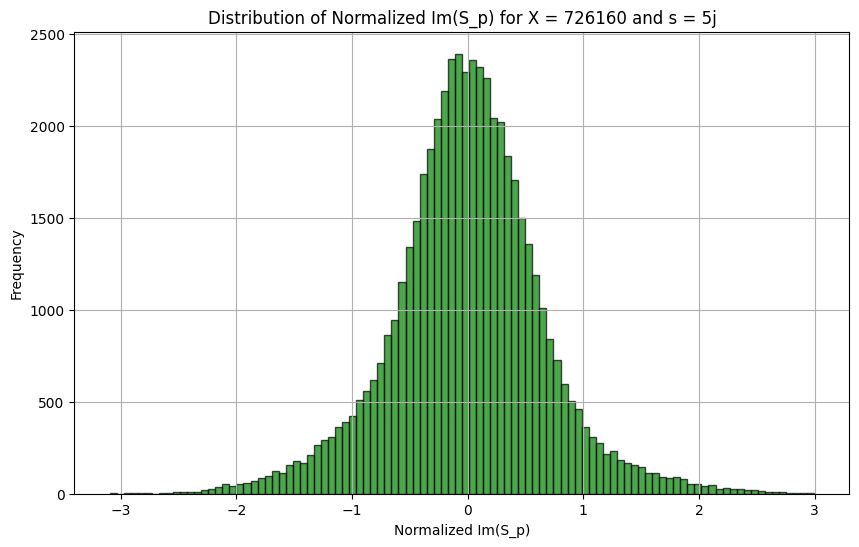

Mean of Normalized Im(S_p) for X = 726160: -0.003659360888367654
Standard deviation of Normalized Im(S_p) for X = 726160: 0.6531905119220399


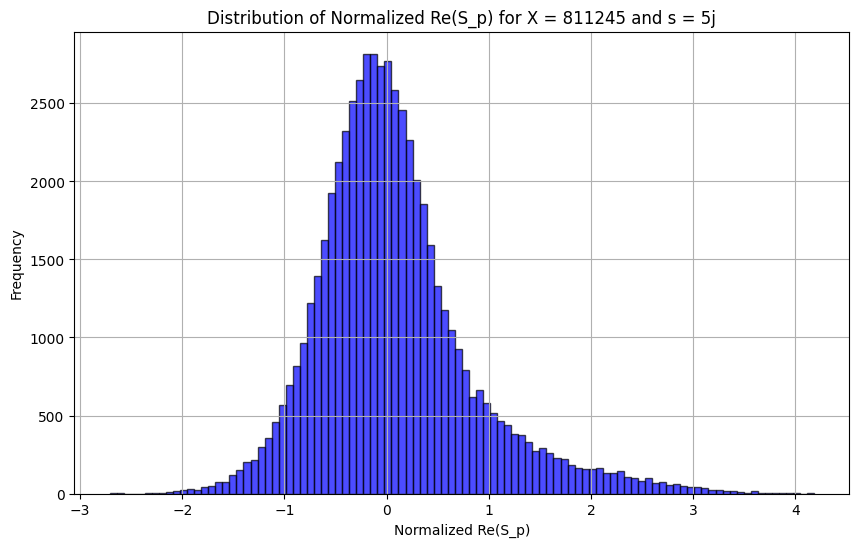

Mean of Normalized Re(S_p) for X = 811245: 0.07064409924763587
Standard deviation of Normalized Re(S_p) for X = 811245: 0.7629001110718306


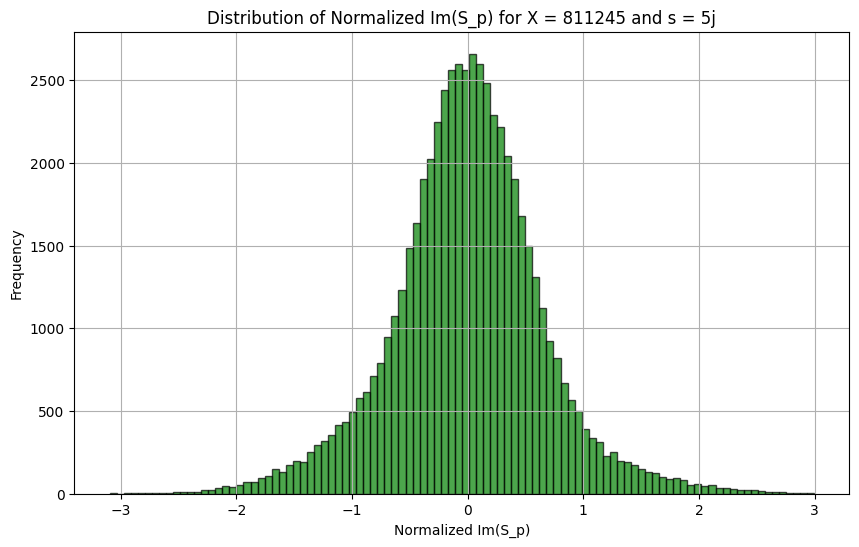

Mean of Normalized Im(S_p) for X = 811245: -0.0046165093793191165
Standard deviation of Normalized Im(S_p) for X = 811245: 0.6521033860370937


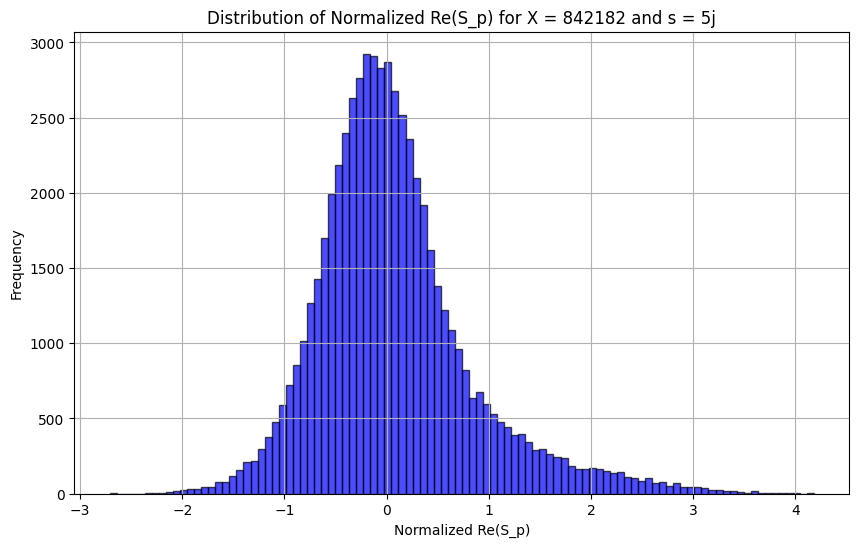

Mean of Normalized Re(S_p) for X = 842182: 0.06993726175268647
Standard deviation of Normalized Re(S_p) for X = 842182: 0.7623678316046256


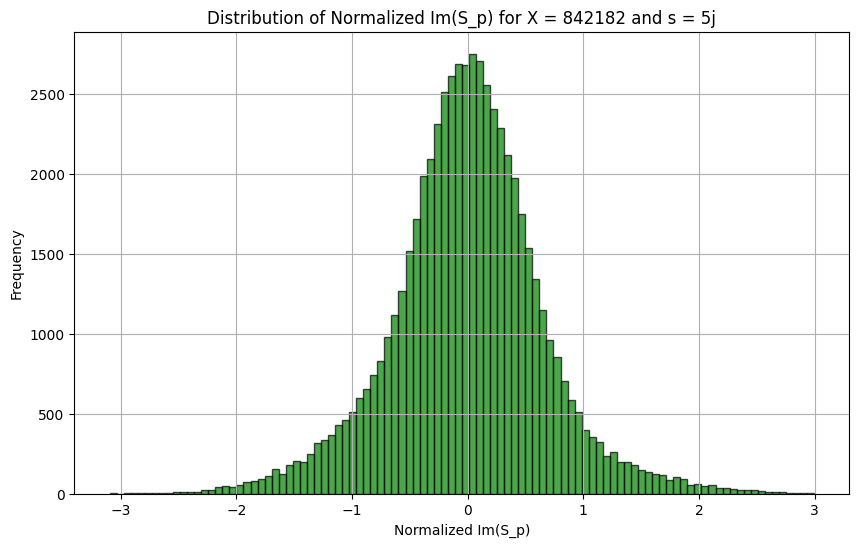

Mean of Normalized Im(S_p) for X = 842182: -0.004721504448259285
Standard deviation of Normalized Im(S_p) for X = 842182: 0.6522730117057146


In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Allow user input for the fixed s value
s_real = float(input("Enter the real part of s: "))
s_imag = float(input("Enter the imaginary part of s: "))
s = complex(s_real, s_imag)

# Generate 5 different X values randomly between 10,000 and 1,000,000
X_values = random.sample(range(10000, 1000001), 5)
X_values.sort()  # Sort X values for better visualization

print("Generated X values (sorted):", X_values)

K = 100  # Fixed upper bound for k

# Function to compute normalized Re(S_p) and Im(S_p) for a fixed X and s
def compute_normalized_S_p(X, s):
    all_primes = list(sympy.primerange(X, 2 * X))
    num_primes = len(all_primes)
    if num_primes == 0:
        print(f"No primes found in the range [{X}, {2 * X}].")
        return None, None

    S_real = []  # Store the normalized real part of S_p for each p
    S_imag = []  # Store the normalized imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        # Normalize S_p by dividing by 10
        S_real.append(S_real_p / 10)
        S_imag.append(S_imag_p / 10)

    # Convert symbolic values to floats
    S_real_float = np.array([float(val) for val in S_real if isinstance(val, (int, float, sympy.Float))])
    S_imag_float = np.array([float(val) for val in S_imag if isinstance(val, (int, float, sympy.Float))])

    return S_real_float, S_imag_float

# Compute S_p and plot for each X value
for idx, X in enumerate(X_values, start=1):
    finite_S_real, finite_S_imag = compute_normalized_S_p(X, s)

    if finite_S_real is None or finite_S_imag is None:
        continue

    # Plot histogram of the normalized real part of S_p for the current X
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Normalized Re(S_p) for X = {X} and s = {s}")
        plt.xlabel("Normalized Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Normalized Re(S_p) for X = {X}: {mean_real}")
        print(f"Standard deviation of Normalized Re(S_p) for X = {X}: {std_real}")

    # Plot histogram of the normalized imaginary part of S_p for the current X
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Normalized Im(S_p) for X = {X} and s = {s}")
        plt.xlabel("Normalized Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Normalized Im(S_p) for X = {X}: {mean_imag}")
        print(f"Standard deviation of Normalized Im(S_p) for X = {X}: {std_imag}")
